<hr style="height:1px">
# WorkBook #2
## Judging the viability of using *ADDEPEV2* as an indicator of respondents mental health
<hr style="height:1px">

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('notebook_repr_html',False)

In [2]:
# Read in the SAS format file into a pandas dataframe
df = pd.read_sas('LLCP2013.XPT')

In [3]:
# Use only completed survey records (433220 no of records)
df = df[df.DISPCODE == 1100.0]
df.shape

(433220, 336)

In [4]:
# Define the list of columns that will be included in the study and make a new dataframe 
# with only those out of 336

#cname = ['_STATE', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'SLEPTIM1', 
#         'BPHIGH4', 'TOLDHI2', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'CHCSCNCR', 'CHCOCNCR',
#         'CHCCOPD1', 'HAVARTH3', 'ADDEPEV2', 'CHCKIDNY', 'DIABETE3', 
#         'MARITAL', 'EMPLOY1', 'CPDEMO1', 'INTERNET', 'SEX', 
#         'QLACTLM2', 'USEEQUIP', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON',
#         'USENOW3', '_RACE', '_AGE_G', '_BMI5', '_EDUCAG', '_INCOMG', '_PACAT1', '_SMOKER3', '_RFBING5',
#         '_RFDRHV4', '_FRUTSUM', '_VEGESUM']

cname = ['ADDEPEV2','MENTHLTH','MISNERVS','MISHOPLS','MISRSTLS','MISDEPRD','MISEFFRT','MISWTLES','MISTMNT','PERSDOC2']

data = pd.DataFrame() # New Dataframe with 42 variables 
for each in df.columns:
    if each in cname:
        data[each] = df[each]

In [5]:
data.head()

   MENTHLTH  PERSDOC2  ADDEPEV2  MISNERVS  MISHOPLS  MISRSTLS  MISDEPRD  \
0      29.0       1.0       1.0       NaN       NaN       NaN       NaN   
1      88.0       1.0       1.0       NaN       NaN       NaN       NaN   
2       2.0       1.0       1.0       NaN       NaN       NaN       NaN   
3      88.0       1.0       2.0       NaN       NaN       NaN       NaN   
4       2.0       1.0       2.0       NaN       NaN       NaN       NaN   

   MISEFFRT  MISWTLES  MISTMNT  
0       NaN       NaN      NaN  
1       NaN       NaN      NaN  
2       NaN       NaN      NaN  
3       NaN       NaN      NaN  
4       NaN       NaN      NaN  

In [6]:
# Define function to remove less useful answers
def cleaner(dframe,variable,val1,val2):
    dframe = dframe[(dframe[variable] != val1) & (dframe[variable] != val2)]
    return dframe

data = cleaner(data,'ADDEPEV2',7.,9.)
data = cleaner(data,'MENTHLTH',77,99)
data = cleaner(data,'PERSDOC2',7.,9.)

data.MENTHLTH[data.MENTHLTH == 88] = 0      # Symbolized healthy days by 0
data.PERSDOC2[data.PERSDOC2 == 2.] = 1

In [7]:
# Include only people with personal doctors
data = data[data.PERSDOC2 == 1] 

In [8]:
data['ill'] = np.where(data.ADDEPEV2 == 1.0, 1, 0)
data['well'] = np.where(data.ADDEPEV2 == 2.0, 1, 0)
#data.drop(['ADDEPEV2'],inplace=True,axis=1)

In [9]:
grouped = data.groupby(['MENTHLTH']).sum().reset_index()
grouped.head()

   MENTHLTH  PERSDOC2  ADDEPEV2  MISNERVS  MISHOPLS  MISRSTLS  MISDEPRD  \
0       0.0  250314.0  475129.0   84307.0   91598.0   85305.0   92568.0   
1       1.0   11334.0   20281.0    3939.0    4506.0    3977.0    4595.0   
2       2.0   17470.0   30111.0    5531.0    6356.0    5586.0    6489.0   
3       3.0    9961.0   16562.0    3132.0    3632.0    3213.0    3699.0   
4       4.0    4838.0    7859.0    1336.0    1587.0    1380.0    1634.0   

   MISEFFRT  MISWTLES  MISTMNT    ill    well  
0   87962.0   92347.0  39266.0  25499  224815  
1    4250.0    4605.0   1809.0   2387    8947  
2    5962.0    6484.0   2545.0   4829   12641  
3    3401.0    3715.0   1457.0   3360    6601  
4    1451.0    1619.0    625.0   1817    3021  

In [10]:
#Compute fraction of respondents with mental illness
grouped['ratio'] = grouped.ill/(grouped.well+grouped.ill)

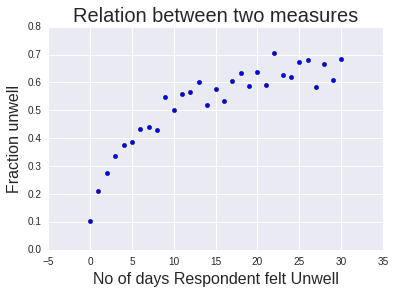

In [11]:
plt.scatter(grouped.MENTHLTH,grouped.ratio)

plt.xlabel('No of days Respondent felt Unwell',size = 16)
plt.ylabel('Fraction unwell',size=16)
plt.title('Relation between two measures',size = 20);

In [12]:
# Make a new data column that includes the number of 'Yes' answers 
# out of 7 Mental Health related questions in Mental Health and Social 
# Stigma Module
# > 3 Yes = Ill
# < 3 Yes = Fit and Fine

stigma = pd.DataFrame()

for each in data[range(3,9)]:
    print each
    data = cleaner(data,each,7,9)
    data[each][(data[each] == 2) | (data[each] == 3)] = 1
    data[each][(data[each] == 4) | (data[each] == 5)] = 0 
    stigma[each] = data[each]

data = cleaner(data,'MISTMNT',7,9)
data.MISTMNT[(data.MISTMNT == 2.)] = 0
stigma['MISTMNT'] = data.MISTMNT

data['total'] = stigma.sum(axis=1)

data['ill2'] = np.where(data.total >= 3.0, 1, 0)
data['well2'] = np.where(data.total < 3.0, 1, 0)

MISNERVS
MISHOPLS


/home/parama/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


MISRSTLS
MISDEPRD
MISEFFRT
MISWTLES


In [13]:
data = data.dropna()
data.head()

        MENTHLTH  PERSDOC2  ADDEPEV2  MISNERVS  MISHOPLS  MISRSTLS  MISDEPRD  \
232014      20.0       1.0       1.0       1.0       0.0       0.0       1.0   
232015       0.0       1.0       2.0       0.0       0.0       1.0       0.0   
232017       0.0       1.0       1.0       0.0       0.0       0.0       0.0   
232018       3.0       1.0       2.0       0.0       0.0       0.0       0.0   
232022       0.0       1.0       2.0       0.0       0.0       0.0       0.0   

        MISEFFRT  MISWTLES  MISTMNT  ill  well  total  ill2  well2  
232014       0.0       1.0      1.0    1     0    4.0     1      0  
232015       0.0       0.0      0.0    0     1    1.0     0      1  
232017       0.0       0.0      1.0    1     0    1.0     0      1  
232018       0.0       1.0      0.0    0     1    1.0     0      1  
232022       0.0       0.0      0.0    0     1    0.0     0      1  

In [14]:
grouped = data.groupby(['MENTHLTH']).sum().reset_index()
grouped.head()
grouped['ratio1'] = grouped.ill/(grouped.well+grouped.ill)
grouped['ratio2'] = grouped.ill2/(grouped.well2+grouped.ill2)


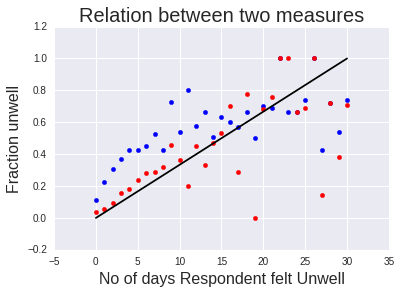

In [15]:
sns.set(font_scale=1.3)
plt.scatter(grouped.MENTHLTH,grouped.ratio1,color='blue')
plt.scatter(grouped.MENTHLTH,grouped.ratio2,color='red')
plt.plot(grouped.MENTHLTH,grouped.MENTHLTH/grouped.MENTHLTH.max(),color='black')
plt.xlabel('No of days Respondent felt Unwell',size = 16)
plt.ylabel('Fraction unwell',size=16)
plt.title('Relation between two measures',size = 20);

In [21]:
grouped[['MENTHLTH','ill','well','ill2','well2']].head(30)

    MENTHLTH   ill   well  ill2  well2
0        0.0  1963  15348   671  16640
1        1.0   203    691    52    842
2        2.0   392    886   119   1159
3        3.0   275    463   115    623
4        4.0   141    190    60    271
5        5.0   361    489   204    646
6        6.0    45     55    28     72
7        7.0   157    142    87    212
8        8.0    27     36    20     43
9        9.0     8      3     5      6
10      10.0   323    275   218    380
11      11.0     4      1     1      4
12      12.0    23     17    18     22
13      13.0     2      1     1      2
14      14.0    52     50    48     54
15      15.0   327    192   275    244
16      16.0     6      4     7      3
17      17.0     4      3     2      5
18      18.0     6      3     7      2
19      19.0     1      1     0      2
20      20.0   224     94   218    100
21      21.0    20      9    22      7
22      22.0     1      0     1      0
23      23.0     2      1     3      0
24      24.0     2      1

In [21]:
grouped.to_csv('fracvsdays_rednblue.csv')

<hr style="height:1px">